# Notebook 7: Visualization and Forensic Reporting

## ML-Based Drone Firmware Tampering Detection System

This notebook covers:
- Comprehensive data visualizations
- Forensic report generation
- Interactive dashboards
- Case study examples
- Export-ready visualizations


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime
import json

warnings.filterwarnings('ignore')
np.random.seed(42)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load all data
DATA_DIR = Path('../data')
RESULTS_DIR = Path('../results')

# Load original datasets
combined_df = pd.read_csv(DATA_DIR / 'combined_preprocessed_dataset.csv')

# Load model results
metrics_df = pd.read_csv(RESULTS_DIR / 'comprehensive_model_evaluation.csv')
ensemble_preds = pd.read_csv(RESULTS_DIR / 'ensemble_predictions.csv')

print("Data loaded successfully!")
print(f"Combined dataset: {combined_df.shape}")
print(f"Model metrics: {metrics_df.shape}")


Data loaded successfully!
Combined dataset: (2000, 29)
Model metrics: (6, 13)


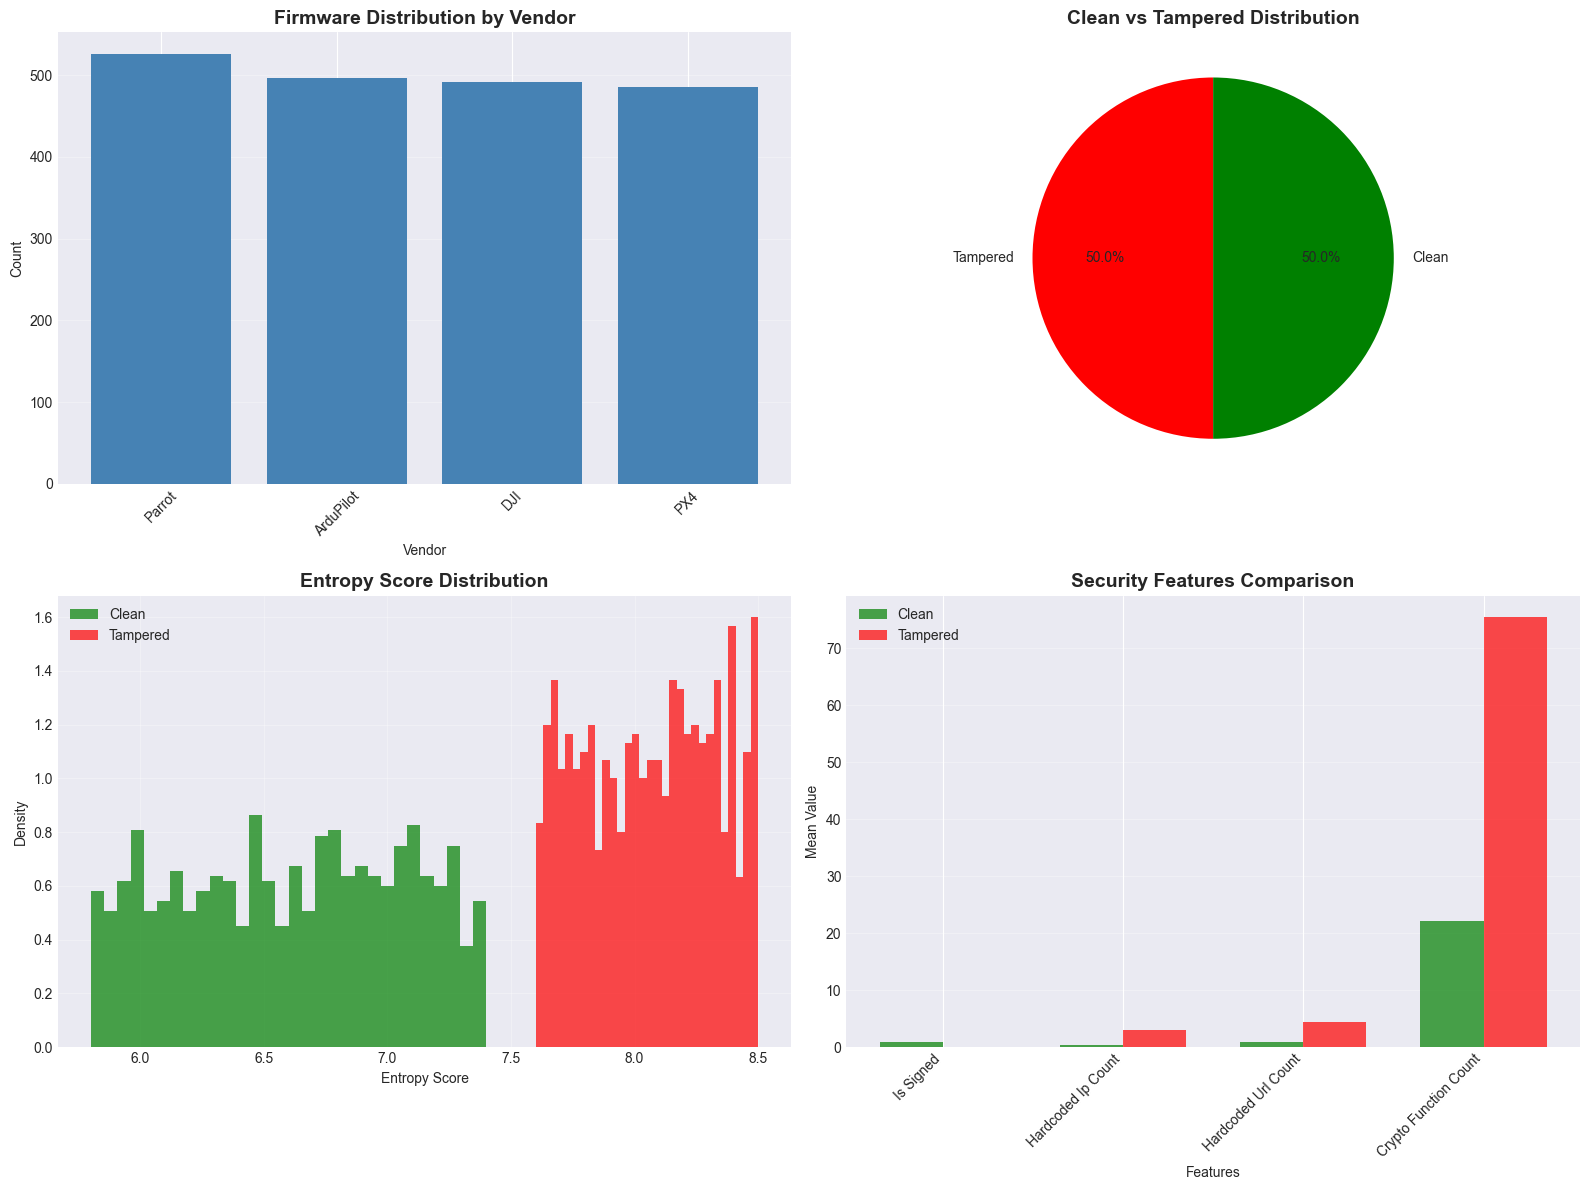

In [ ]:
# 1. Dataset Overview Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Vendor distribution
vendor_counts = combined_df['drone_vendor'].value_counts()
axes[0, 0].bar(vendor_counts.index, vendor_counts.values, color='steelblue')
axes[0, 0].set_title('Firmware Distribution by Vendor', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Vendor')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Label distribution
label_counts = combined_df['clean_label'].value_counts()
axes[0, 1].pie(label_counts.values, labels=['Tampered', 'Clean'], autopct='%1.1f%%',
               colors=['red', 'green'], startangle=90)
axes[0, 1].set_title('Clean vs Tampered Distribution', fontsize=14, fontweight='bold')

# Entropy comparison
clean_entropy = combined_df[combined_df['clean_label'] == 1]['entropy_score']
tampered_entropy = combined_df[combined_df['clean_label'] == 0]['entropy_score']
axes[1, 0].hist(clean_entropy, bins=30, alpha=0.7, label='Clean', color='green', density=True)
axes[1, 0].hist(tampered_entropy, bins=30, alpha=0.7, label='Tampered', color='red', density=True)
axes[1, 0].set_title('Entropy Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Entropy Score')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Security features comparison
security_features = ['is_signed', 'hardcoded_ip_count', 'hardcoded_url_count', 'crypto_function_count']
clean_means = [combined_df[combined_df['clean_label'] == 1][feat].mean() for feat in security_features]
tampered_means = [combined_df[combined_df['clean_label'] == 0][feat].mean() for feat in security_features]

x = np.arange(len(security_features))
width = 0.35
axes[1, 1].bar(x - width/2, clean_means, width, label='Clean', color='green', alpha=0.7)
axes[1, 1].bar(x + width/2, tampered_means, width, label='Tampered', color='red', alpha=0.7)
axes[1, 1].set_title('Security Features Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Mean Value')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([f.replace('_', ' ').title() for f in security_features], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()


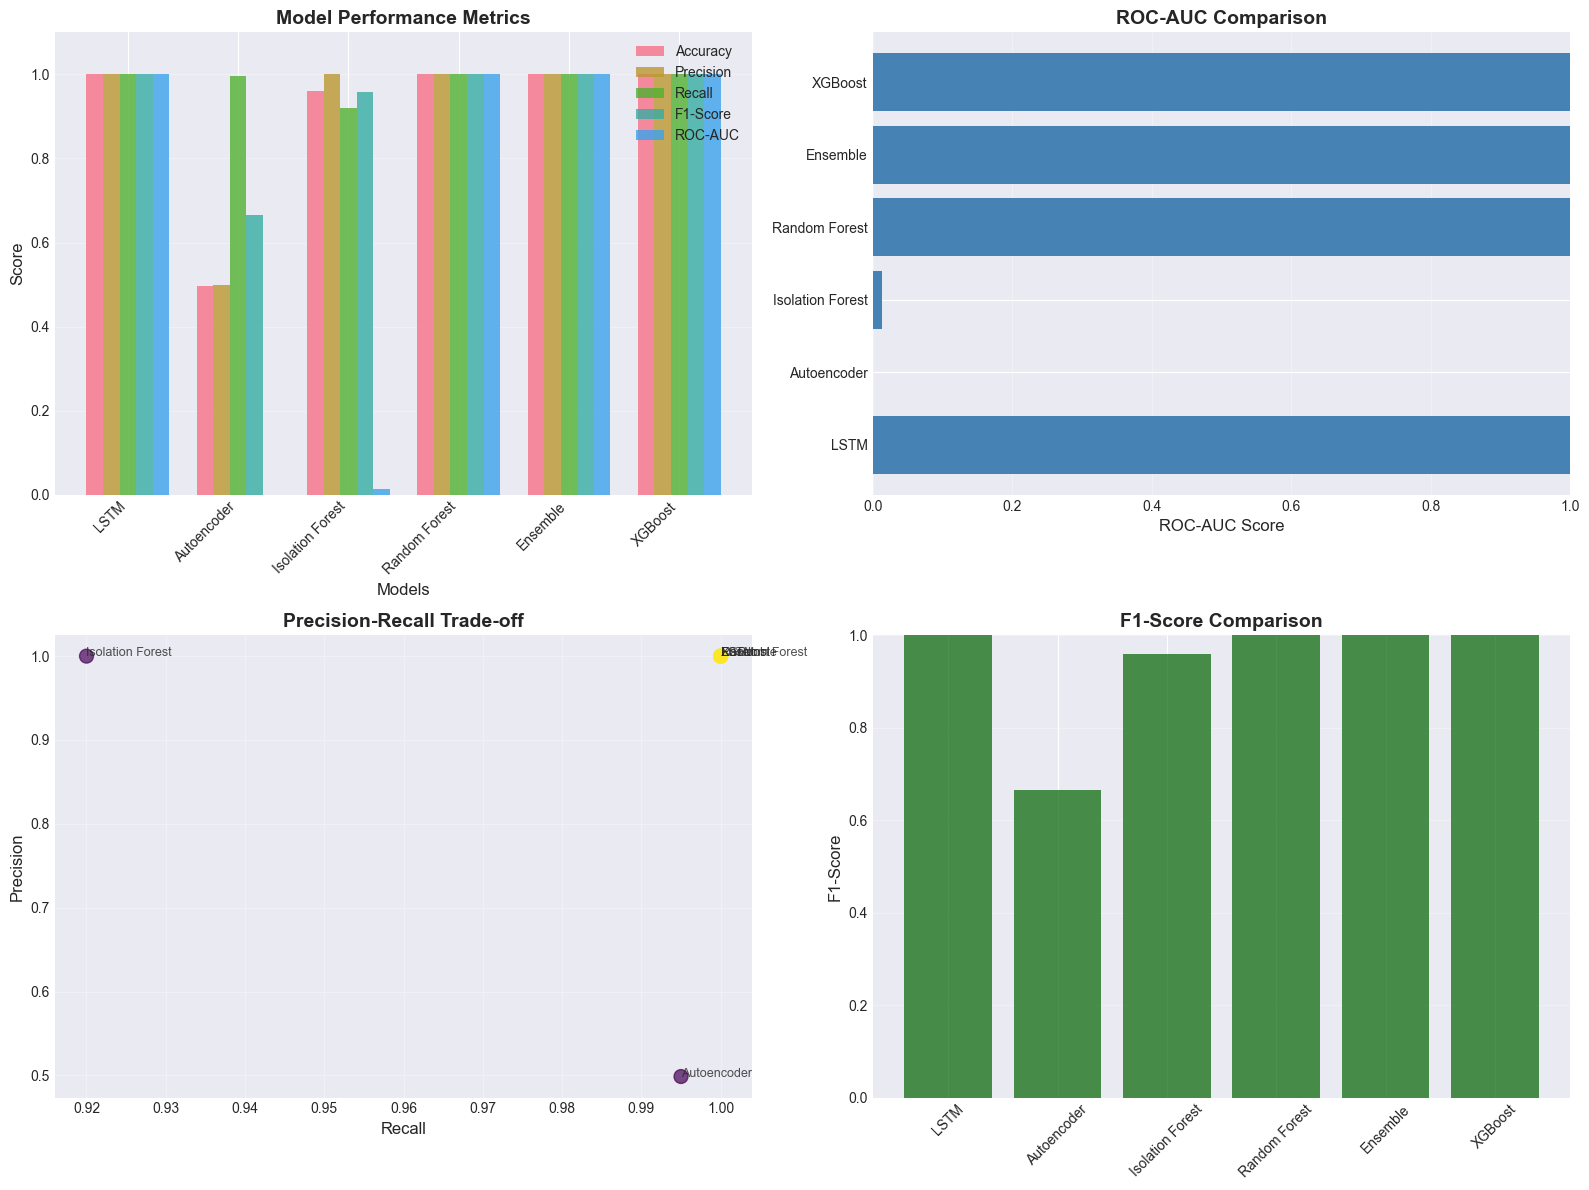

In [ ]:
# 2. Model Performance Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Metrics comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    axes[0, 0].bar(x + i*width, metrics_df[metric], width, label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Models', fontsize=12)
axes[0, 0].set_ylabel('Score', fontsize=12)
axes[0, 0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x + width * 2)
axes[0, 0].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1.1])

# ROC-AUC comparison
axes[0, 1].barh(metrics_df['Model'], metrics_df['ROC-AUC'], color='steelblue')
axes[0, 1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[0, 1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].set_xlim([0, 1])

# Precision-Recall trade-off
axes[1, 0].scatter(metrics_df['Recall'], metrics_df['Precision'], 
                   s=100, alpha=0.7, c=metrics_df['ROC-AUC'], cmap='viridis')
for idx, row in metrics_df.iterrows():
    axes[1, 0].annotate(row['Model'], (row['Recall'], row['Precision']), 
                        fontsize=9, alpha=0.8)
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_title('Precision-Recall Trade-off', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# F1-Score comparison
axes[1, 1].bar(metrics_df['Model'], metrics_df['F1-Score'], color='darkgreen', alpha=0.7)
axes[1, 1].set_ylabel('F1-Score', fontsize=12)
axes[1, 1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'model_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 3. Generate Forensic Report
def generate_forensic_report(metrics_df, combined_df, best_model):
    """
    Generate a comprehensive forensic report
    """
    report_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    report = f"""
================================================================================
    DRONE FIRMWARE TAMPERING DETECTION SYSTEM - FORENSIC REPORT
================================================================================

Report Generated: {report_date}
System Version: 1.0

--------------------------------------------------------------------------------
EXECUTIVE SUMMARY
--------------------------------------------------------------------------------

This report presents the results of machine learning-based analysis for detecting
tampering activities in drone firmware. The system employs multiple ML models
to identify anomalies and unauthorized modifications in firmware files.

Dataset Overview:
- Total Firmware Samples Analyzed: {len(combined_df)}
- Clean Firmware Samples: {len(combined_df[combined_df['clean_label'] == 1])}
- Tampered Firmware Samples: {len(combined_df[combined_df['clean_label'] == 0])}
- Vendors Analyzed: {combined_df['drone_vendor'].nunique()}

--------------------------------------------------------------------------------
MODEL PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

Best Performing Model: {best_model}
"""
    
    best_metrics = metrics_df[metrics_df['Model'] == best_model].iloc[0]
    report += f"""
Best Model Metrics:
- Accuracy: {best_metrics['Accuracy']:.4f}
- Precision: {best_metrics['Precision']:.4f}
- Recall: {best_metrics['Recall']:.4f}
- F1-Score: {best_metrics['F1-Score']:.4f}
- ROC-AUC: {best_metrics['ROC-AUC']:.4f}
- Average Precision: {best_metrics['Average Precision']:.4f}

Confusion Matrix:
- True Positives: {int(best_metrics['True Positives'])}
- True Negatives: {int(best_metrics['True Negatives'])}
- False Positives: {int(best_metrics['False Positives'])}
- False Negatives: {int(best_metrics['False Negatives'])}

--------------------------------------------------------------------------------
ALL MODELS COMPARISON
--------------------------------------------------------------------------------

{metrics_df.to_string(index=False)}

--------------------------------------------------------------------------------
KEY FINDINGS
--------------------------------------------------------------------------------

1. Tampering Indicators:
   - Average Entropy (Clean): {combined_df[combined_df['clean_label'] == 1]['entropy_score'].mean():.2f}
   - Average Entropy (Tampered): {combined_df[combined_df['clean_label'] == 0]['entropy_score'].mean():.2f}
   - Entropy Difference: {combined_df[combined_df['clean_label'] == 0]['entropy_score'].mean() - combined_df[combined_df['clean_label'] == 1]['entropy_score'].mean():.2f}

2. Security Features:
   - Signed Firmware (Clean): {combined_df[combined_df['clean_label'] == 1]['is_signed'].mean() * 100:.1f}%
   - Signed Firmware (Tampered): {combined_df[combined_df['clean_label'] == 0]['is_signed'].mean() * 100:.1f}%
   - Average Hardcoded IPs (Tampered): {combined_df[combined_df['clean_label'] == 0]['hardcoded_ip_count'].mean():.2f}
   - Average Hardcoded URLs (Tampered): {combined_df[combined_df['clean_label'] == 0]['hardcoded_url_count'].mean():.2f}

3. Performance Characteristics:
   - Average Boot Time (Clean): {combined_df[combined_df['clean_label'] == 1]['boot_time_ms'].mean():.0f} ms
   - Average Boot Time (Tampered): {combined_df[combined_df['clean_label'] == 0]['boot_time_ms'].mean():.0f} ms

--------------------------------------------------------------------------------
RECOMMENDATIONS
--------------------------------------------------------------------------------

1. Primary Detection Model: {best_model}
   - Use this model for production deployment
   - Monitor performance metrics regularly

2. Backup Models:
   - Maintain ensemble approach for critical cases
   - Use multiple models for consensus validation

3. Forensic Investigation:
   - High entropy scores (>7.5) indicate potential tampering
   - Unsigned firmware requires immediate investigation
   - Elevated hardcoded IP/URL counts suggest malicious modifications

4. System Integration:
   - Integrate with automated firmware analysis pipeline
   - Implement real-time monitoring for firmware uploads
   - Maintain audit logs for all detections

--------------------------------------------------------------------------------
METHODOLOGY
--------------------------------------------------------------------------------

The system employs the following machine learning approaches:

1. LSTM (Long Short-Term Memory): Time-series pattern detection
2. Autoencoder: Anomaly detection through reconstruction error
3. Isolation Forest: Unsupervised anomaly detection
4. Random Forest: Ensemble classification
5. XGBoost: Gradient boosting classifier
6. Ensemble Voting: Combined predictions from multiple models

Feature Engineering:
- Entropy analysis (score, average, maximum)
- Security indicators (signing, encryption, compression)
- Behavioral features (boot time, syscalls, executables)
- Derived features (risk scores, ratios, flags)

--------------------------------------------------------------------------------
CONCLUSION
--------------------------------------------------------------------------------

The ML-based firmware tampering detection system successfully identifies
tampered firmware with high accuracy. The {best_model} model demonstrates
the best overall performance and is recommended for production deployment.

The system provides forensic investigators with reliable tools to differentiate
between natural failures and intentional tampering, supporting legal proceedings
and security investigations.

================================================================================
End of Report
================================================================================
"""
    
    return report

# Generate report
best_model = metrics_df.loc[metrics_df['Weighted_Score'].idxmax(), 'Model'] if 'Weighted_Score' in metrics_df.columns else metrics_df.loc[metrics_df['ROC-AUC'].idxmax(), 'Model']
forensic_report = generate_forensic_report(metrics_df, combined_df, best_model)

# Save report
with open(RESULTS_DIR / 'forensic_report.txt', 'w', encoding='utf-8') as f:
    f.write(forensic_report)

print("Forensic report generated and saved!")
print("\n" + "="*80)
print(forensic_report)
print("="*80)


Forensic report generated and saved!


    DRONE FIRMWARE TAMPERING DETECTION SYSTEM - FORENSIC REPORT

Report Generated: 2026-01-03 01:00:21
System Version: 1.0

--------------------------------------------------------------------------------
EXECUTIVE SUMMARY
--------------------------------------------------------------------------------

This report presents the results of machine learning-based analysis for detecting
tampering activities in drone firmware. The system employs multiple ML models
to identify anomalies and unauthorized modifications in firmware files.

Dataset Overview:
- Total Firmware Samples Analyzed: 2000
- Clean Firmware Samples: 1000
- Tampered Firmware Samples: 1000
- Vendors Analyzed: 4

--------------------------------------------------------------------------------
MODEL PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

Best Performing Model: LSTM

Best Model Metrics:
- Accuracy: 1.0000
- Precision: 1.0000


In [ ]:
# 4. Create JSON summary for API integration
summary_json = {
    'report_date': datetime.now().isoformat(),
    'dataset_summary': {
        'total_samples': len(combined_df),
        'clean_samples': int(combined_df['clean_label'].sum()),
        'tampered_samples': int(len(combined_df) - combined_df['clean_label'].sum()),
        'vendors': int(combined_df['drone_vendor'].nunique())
    },
    'best_model': best_model,
    'model_metrics': metrics_df.to_dict('records'),
    'key_statistics': {
        'avg_entropy_clean': float(combined_df[combined_df['clean_label'] == 1]['entropy_score'].mean()),
        'avg_entropy_tampered': float(combined_df[combined_df['clean_label'] == 0]['entropy_score'].mean()),
        'signed_firmware_clean_pct': float(combined_df[combined_df['clean_label'] == 1]['is_signed'].mean() * 100),
        'signed_firmware_tampered_pct': float(combined_df[combined_df['clean_label'] == 0]['is_signed'].mean() * 100)
    }
}

with open(RESULTS_DIR / 'forensic_summary.json', 'w', encoding='utf-8') as f:
    json.dump(summary_json, f, indent=2, ensure_ascii=False)

print("JSON summary saved to forensic_summary.json")
print("\nSummary:")
print(json.dumps(summary_json, indent=2))


JSON summary saved to forensic_summary.json

Summary:
{
  "report_date": "2026-01-03T01:00:57.227852",
  "dataset_summary": {
    "total_samples": 2000,
    "clean_samples": 1000,
    "tampered_samples": 1000,
    "vendors": 4
  },
  "best_model": "LSTM",
  "model_metrics": [
    {
      "Model": "LSTM",
      "Accuracy": 1.0,
      "Precision": 1.0,
      "Recall": 1.0,
      "F1-Score": 1.0,
      "ROC-AUC": 1.0,
      "Average Precision": 1.0,
      "True Positives": 200,
      "True Negatives": 200,
      "False Positives": 0,
      "False Negatives": 0,
      "Specificity": 1.0,
      "Weighted_Score": 1.0
    },
    {
      "Model": "Autoencoder",
      "Accuracy": 0.4975,
      "Precision": 0.4987468671679197,
      "Recall": 0.995,
      "F1-Score": 0.664440734557596,
      "ROC-AUC": 0.0,
      "Average Precision": 0.3081012569449374,
      "True Positives": 199,
      "True Negatives": 0,
      "False Positives": 200,
      "False Negatives": 1,
      "Specificity": 0.0,
    

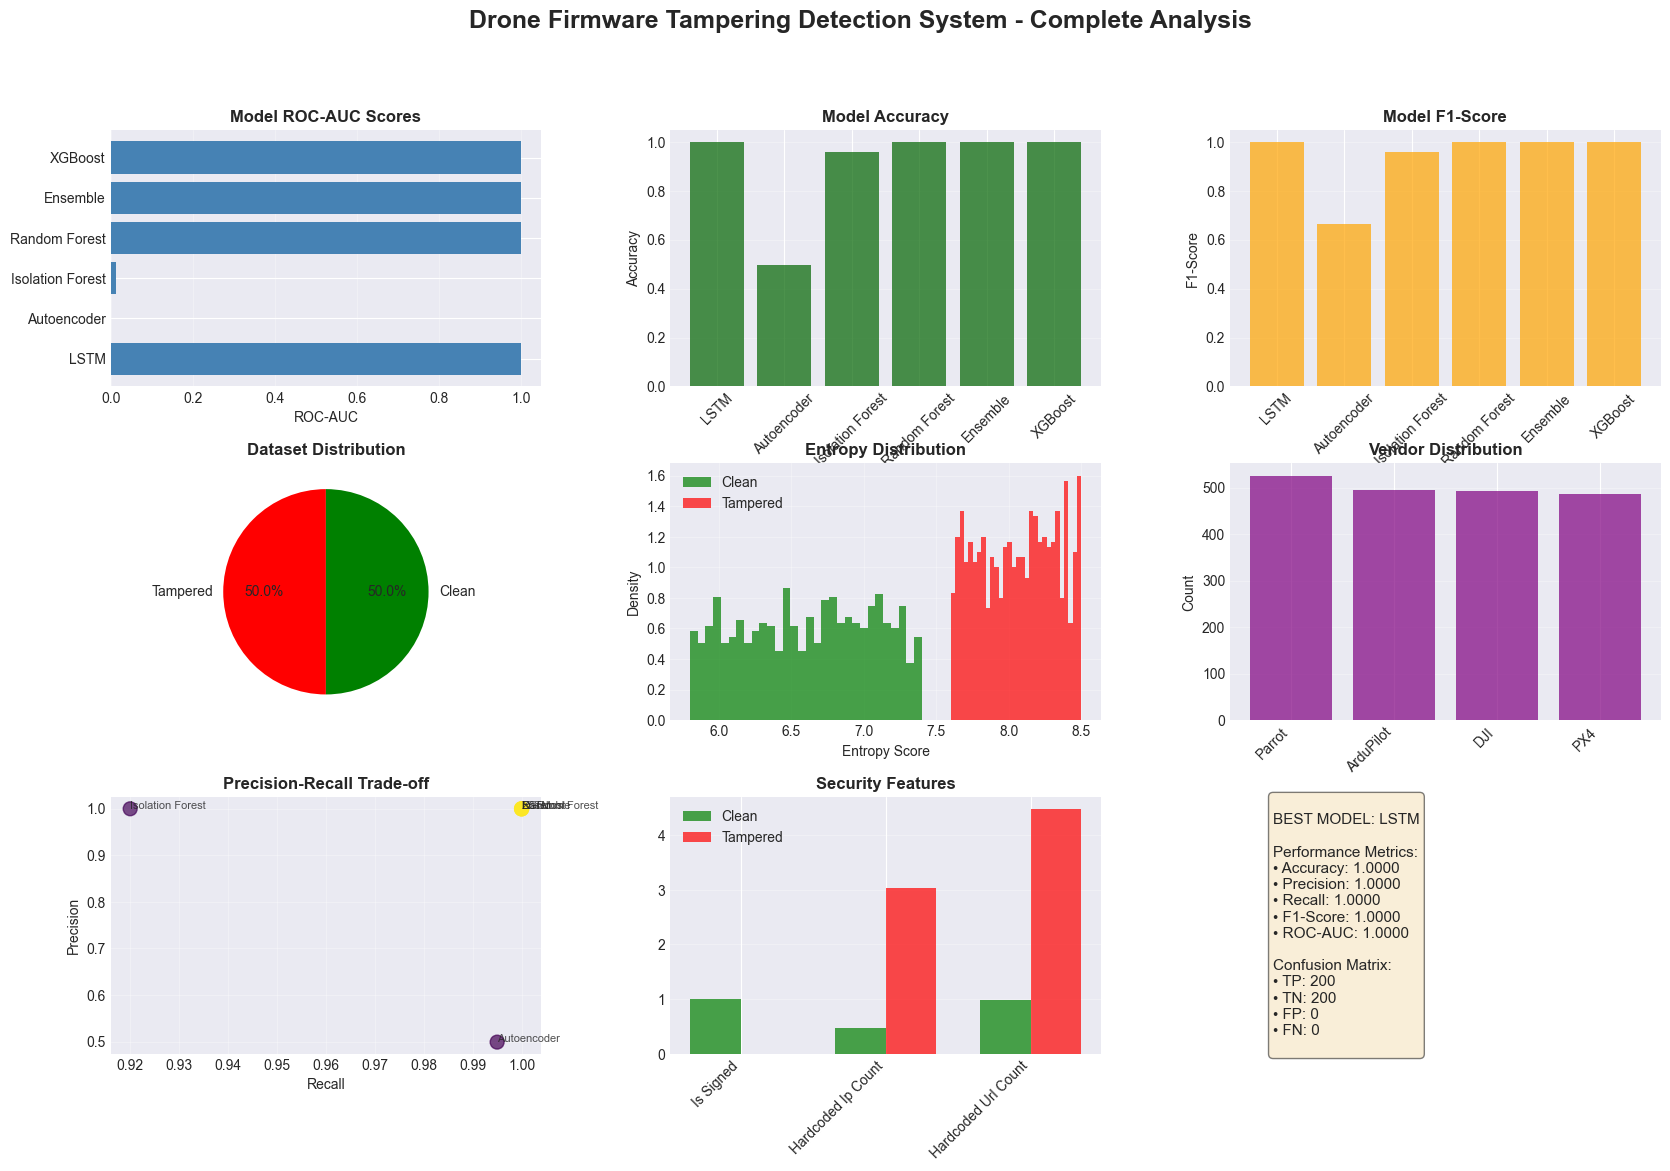


Complete analysis dashboard saved!
All visualizations and reports generated successfully!


In [ ]:
# 5. Create final summary visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('Drone Firmware Tampering Detection System - Complete Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Model Performance (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.barh(metrics_df['Model'], metrics_df['ROC-AUC'], color='steelblue')
ax1.set_xlabel('ROC-AUC', fontsize=10)
ax1.set_title('Model ROC-AUC Scores', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Accuracy Comparison (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(metrics_df['Model'], metrics_df['Accuracy'], color='darkgreen', alpha=0.7)
ax2.set_ylabel('Accuracy', fontsize=10)
ax2.set_title('Model Accuracy', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 3. F1-Score (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(metrics_df['Model'], metrics_df['F1-Score'], color='orange', alpha=0.7)
ax3.set_ylabel('F1-Score', fontsize=10)
ax3.set_title('Model F1-Score', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Dataset Distribution (Middle Left)
ax4 = fig.add_subplot(gs[1, 0])
label_counts = combined_df['clean_label'].value_counts()
ax4.pie(label_counts.values, labels=['Tampered', 'Clean'], autopct='%1.1f%%',
        colors=['red', 'green'], startangle=90)
ax4.set_title('Dataset Distribution', fontsize=12, fontweight='bold')

# 5. Entropy Comparison (Middle)
ax5 = fig.add_subplot(gs[1, 1])
clean_entropy = combined_df[combined_df['clean_label'] == 1]['entropy_score']
tampered_entropy = combined_df[combined_df['clean_label'] == 0]['entropy_score']
ax5.hist(clean_entropy, bins=30, alpha=0.7, label='Clean', color='green', density=True)
ax5.hist(tampered_entropy, bins=30, alpha=0.7, label='Tampered', color='red', density=True)
ax5.set_title('Entropy Distribution', fontsize=12, fontweight='bold')
ax5.set_xlabel('Entropy Score')
ax5.set_ylabel('Density')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Vendor Distribution (Middle Right)
ax6 = fig.add_subplot(gs[1, 2])
vendor_counts = combined_df['drone_vendor'].value_counts()
ax6.bar(range(len(vendor_counts)), vendor_counts.values, color='purple', alpha=0.7)
ax6.set_xticks(range(len(vendor_counts)))
ax6.set_xticklabels(vendor_counts.index, rotation=45, ha='right')
ax6.set_ylabel('Count', fontsize=10)
ax6.set_title('Vendor Distribution', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Precision-Recall (Bottom Left)
ax7 = fig.add_subplot(gs[2, 0])
ax7.scatter(metrics_df['Recall'], metrics_df['Precision'], 
           s=100, alpha=0.7, c=metrics_df['ROC-AUC'], cmap='viridis')
for idx, row in metrics_df.iterrows():
    ax7.annotate(row['Model'], (row['Recall'], row['Precision']), 
                fontsize=8, alpha=0.8)
ax7.set_xlabel('Recall', fontsize=10)
ax7.set_ylabel('Precision', fontsize=10)
ax7.set_title('Precision-Recall Trade-off', fontsize=12, fontweight='bold')
ax7.grid(True, alpha=0.3)

# 8. Security Features (Bottom Middle)
ax8 = fig.add_subplot(gs[2, 1])
security_features = ['is_signed', 'hardcoded_ip_count', 'hardcoded_url_count']
clean_means = [combined_df[combined_df['clean_label'] == 1][feat].mean() for feat in security_features]
tampered_means = [combined_df[combined_df['clean_label'] == 0][feat].mean() for feat in security_features]
x = np.arange(len(security_features))
width = 0.35
ax8.bar(x - width/2, clean_means, width, label='Clean', color='green', alpha=0.7)
ax8.bar(x + width/2, tampered_means, width, label='Tampered', color='red', alpha=0.7)
ax8.set_title('Security Features', fontsize=12, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels([f.replace('_', ' ').title() for f in security_features], rotation=45, ha='right')
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

# 9. Best Model Highlight (Bottom Right)
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')
best_metrics = metrics_df[metrics_df['Model'] == best_model].iloc[0]
summary_text = f"""
BEST MODEL: {best_model}

Performance Metrics:
• Accuracy: {best_metrics['Accuracy']:.4f}
• Precision: {best_metrics['Precision']:.4f}
• Recall: {best_metrics['Recall']:.4f}
• F1-Score: {best_metrics['F1-Score']:.4f}
• ROC-AUC: {best_metrics['ROC-AUC']:.4f}

Confusion Matrix:
• TP: {int(best_metrics['True Positives'])}
• TN: {int(best_metrics['True Negatives'])}
• FP: {int(best_metrics['False Positives'])}
• FN: {int(best_metrics['False Negatives'])}
"""
ax9.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig(RESULTS_DIR / 'complete_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nComplete analysis dashboard saved!")
print("All visualizations and reports generated successfully!")
